In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Parameters (it will define total number of rows for the dataset)
num_routes = 1000

# Generate random start and end coordinates (latitude and longitude)
start_coords = np.random.uniform(low=(40.0, -75.0), high=(41.0, -74.0), size=(num_routes, 2))
end_coords = np.random.uniform(low=(40.0, -75.0), high=(41.0, -74.0), size=(num_routes, 2))

# Calculate distance (in km)
def calculate_distance(lat1, lon1, lat2, lon2):
    # This is the Euclidean distance formula in a 2D plane
    # 111: This number is an approximation of the distance in kilometers (took help from google for this feature)
    return np.sqrt((lat2 - lat1)**2 + (lon2 - lon1)**2) * 111 

distances = np.array([calculate_distance(start_coords[i, 0], start_coords[i, 1], end_coords[i, 0], end_coords[i, 1]) for i in range(num_routes)])

# Generate random number of turns
num_turns = np.random.randint(5, 20, num_routes)

# Generate random number of traffic lights
num_traffic_lights = np.random.randint(0, 10, num_routes)

# Generate random time of day
time_of_day = np.random.choice(['morning', 'afternoon', 'evening', 'night'], num_routes)

# Generate random day of the week
days_of_week = np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], num_routes)

# Generate historical average speed (in km/h)
historical_avg_speed = np.random.uniform(20, 60, num_routes)

# Simulating current traffic conditions as a multiplier for historical average speed
# 0.9: (10% slower than the historical average).
# 1.0: (no change in speed).
# 1.1: (10% faster than the historical average).

traffic_conditions = np.random.choice([0.9, 1.0, 1.1], num_routes)
current_speed = historical_avg_speed * traffic_conditions

# Calculate ETA in minutes: ETA = (Distance / Current Speed) * 60 + (Factors for turns and traffic lights)
# speed = distance/time
# To make an impact on ETA, "(num_turns * 0.5) + (num_traffic_lights * 0.5)" is added so that the data will get more realistic
eta = (distances / current_speed) * 60 + (num_turns * 0.5) + (num_traffic_lights * 0.5)

# Creating DataFrame
df = pd.DataFrame({
    'Start Latitude': start_coords[:, 0],
    'Start Longitude': start_coords[:, 1],
    'End Latitude': end_coords[:, 0],
    'End Longitude': end_coords[:, 1],
    'Distance (km)': distances,
    'Number of Turns': num_turns,
    'Number of Traffic Lights': num_traffic_lights,
    'Time of Day': time_of_day,
    'Day of the Week': days_of_week,
    'Historical Avg Speed (km/h)': historical_avg_speed,
    'Current Speed (km/h)': current_speed,
    'ETA (minutes)': eta
})

In [3]:
df.head()

,Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (km),Number of Turns,Number of Traffic Lights,Time of Day,Day of the Week,Historical Avg Speed (km/h),Current Speed (km/h),ETA (minutes)
0,40.374540,-74.049286,40.261706,-74.753021,79.112346,14,1,evening,Sunday,38.384590,38.384590,131.162667
1,40.731994,-74.401342,40.906255,-74.750454,43.310794,9,8,morning,Thursday,45.140156,45.140156,66.068424
2,40.156019,-74.844005,40.271950,-74.240602,68.202802,9,5,night,Wednesday,42.290073,46.519081,94.967519
3,40.058084,-74.133824,40.449740,-74.223289,44.593647,15,4,evening,Sunday,49.705440,54.675984,58.435906
4,40.601115,-74.291927,40.065366,-74.512429,64.307972,11,9,night,Sunday,31.190677,28.071610,147.451268


In [4]:
df.shape

(1000, 12)

In [5]:
# Information of features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Start Latitude               1000 non-null   float64
 1   Start Longitude              1000 non-null   float64
 2   End Latitude                 1000 non-null   float64
 3   End Longitude                1000 non-null   float64
 4   Distance (km)                1000 non-null   float64
 5   Number of Turns              1000 non-null   int32  
 6   Number of Traffic Lights     1000 non-null   int32  
 7   Time of Day                  1000 non-null   object 
 8   Day of the Week              1000 non-null   object 
 9   Historical Avg Speed (km/h)  1000 non-null   float64
 10  Current Speed (km/h)         1000 non-null   float64
 11  ETA (minutes)                1000 non-null   float64
dtypes: float64(8), int32(2), object(2)
memory usage: 86.1+ KB


<Axes: xlabel='Day of the Week', ylabel='ETA (minutes)'>

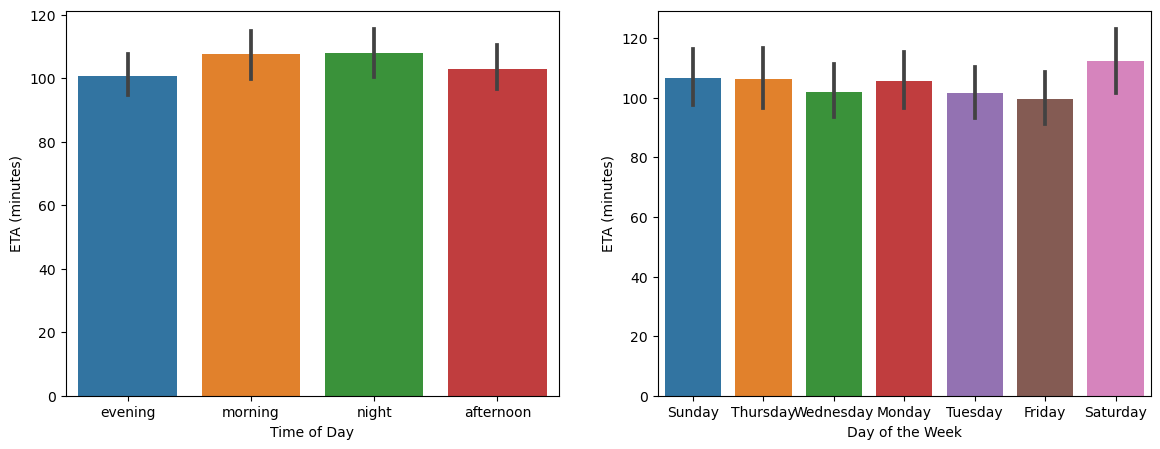

In [6]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.barplot(x=df['Time of Day'],y=df['ETA (minutes)'])

plt.subplot(1,2,2)
sns.barplot(x=df['Day of the Week'],y=df['ETA (minutes)'])

Time of Day and Day of the week are not making any noticable impact on the ETA.

In [7]:
# Checking Correlation

df.drop(columns=['Time of Day','Day of the Week']).corr()

,Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (km),Number of Turns,Number of Traffic Lights,Historical Avg Speed (km/h),Current Speed (km/h),ETA (minutes)
Start Latitude,1.000000,0.004360,-0.001364,-0.006905,-0.038310,0.028615,0.026592,0.035633,0.040005,-0.052809
Start Longitude,0.004360,1.000000,0.023699,0.010033,0.049206,-0.010984,-0.039446,0.043052,0.044355,0.012838
End Latitude,-0.001364,0.023699,1.000000,-0.008475,0.020936,0.033110,-0.001433,0.012187,0.019044,0.010317
End Longitude,-0.006905,0.010033,-0.008475,1.000000,-0.042832,0.021479,-0.033375,0.020780,0.019200,-0.038524
Distance (km),-0.038310,0.049206,0.020936,-0.042832,1.000000,-0.028766,-0.010244,0.029534,0.025860,0.790437
Number of Turns,0.028615,-0.010984,0.033110,0.021479,-0.028766,1.000000,-0.015670,0.019796,0.026460,-0.013179
Number of Traffic Lights,0.026592,-0.039446,-0.001433,-0.033375,-0.010244,-0.015670,1.000000,0.031098,0.050061,0.007583
Historical Avg Speed (km/h),0.035633,0.043052,0.012187,0.020780,0.029534,0.019796,0.031098,1.000000,0.956846,-0.487199
Current Speed (km/h),0.040005,0.044355,0.019044,0.019200,0.025860,0.026460,0.050061,0.956846,1.000000,-0.504981
ETA (minutes),-0.052809,0.012838,0.010317,-0.038524,0.790437,-0.013179,0.007583,-0.487199,-0.504981,1.000000


<Axes: >

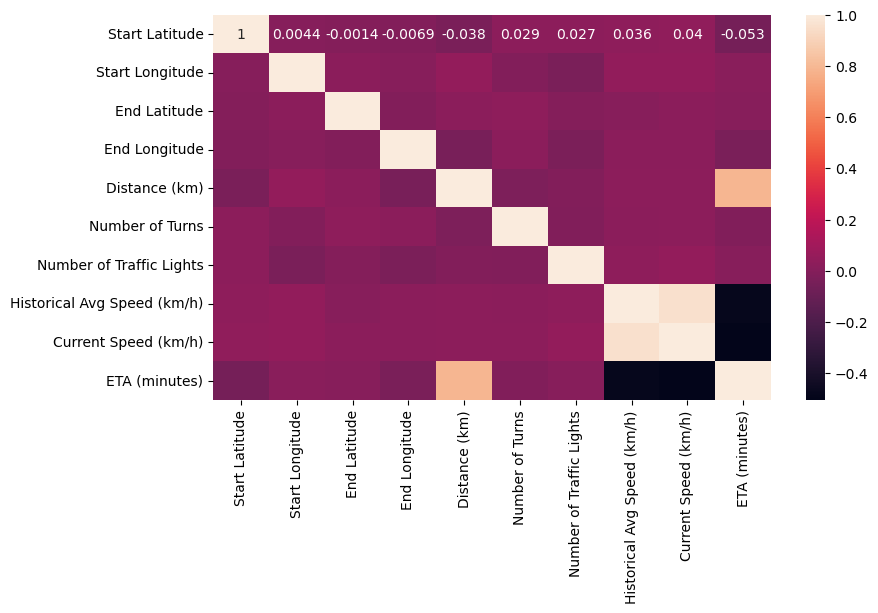

In [8]:
# Heatmap for better understanding

plt.figure(figsize=(9,5))
sns.heatmap(df.drop(columns=['Time of Day','Day of the Week']).corr(),annot=True)

#### Conclusion : Distance, Current Speed, Historical Avg speed are going to be the most important features as ETA has high (positive and negative) correlation with these features 

Given these insights, I might consider focusing on distance, current speed, and historical average speed as the primary predictors in our model. Other features might be used for additional context.

In [10]:
# There is no null/missing values as we have created this dataset

df.isnull().sum()

Start Latitude                 0
Start Longitude                0
End Latitude                   0
End Longitude                  0
Distance (km)                  0
Number of Turns                0
Number of Traffic Lights       0
Time of Day                    0
Day of the Week                0
Historical Avg Speed (km/h)    0
Current Speed (km/h)           0
ETA (minutes)                  0
dtype: int64

In [9]:
df.head()

,Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (km),Number of Turns,Number of Traffic Lights,Time of Day,Day of the Week,Historical Avg Speed (km/h),Current Speed (km/h),ETA (minutes)
0,40.374540,-74.049286,40.261706,-74.753021,79.112346,14,1,evening,Sunday,38.384590,38.384590,131.162667
1,40.731994,-74.401342,40.906255,-74.750454,43.310794,9,8,morning,Thursday,45.140156,45.140156,66.068424
2,40.156019,-74.844005,40.271950,-74.240602,68.202802,9,5,night,Wednesday,42.290073,46.519081,94.967519
3,40.058084,-74.133824,40.449740,-74.223289,44.593647,15,4,evening,Sunday,49.705440,54.675984,58.435906
4,40.601115,-74.291927,40.065366,-74.512429,64.307972,11,9,night,Sunday,31.190677,28.071610,147.451268


In [11]:
# Handling Categorical features
# LabelEncoding

from sklearn.preprocessing import LabelEncoder

In [12]:
# Initializing Encoder

encoder = LabelEncoder()

In [14]:
# Fit_transform

df['Time of Day Encoded'] = encoder.fit_transform(df['Time of Day'])
df['Day of the Week Encoded'] = encoder.fit_transform(df['Day of the Week'])

In [15]:
df.head()

,Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (km),Number of Turns,Number of Traffic Lights,Time of Day,Day of the Week,Historical Avg Speed (km/h),Current Speed (km/h),ETA (minutes),Time of Day Encoded,Day of the Week Encoded
0,40.374540,-74.049286,40.261706,-74.753021,79.112346,14,1,evening,Sunday,38.384590,38.384590,131.162667,1,3
1,40.731994,-74.401342,40.906255,-74.750454,43.310794,9,8,morning,Thursday,45.140156,45.140156,66.068424,2,4
2,40.156019,-74.844005,40.271950,-74.240602,68.202802,9,5,night,Wednesday,42.290073,46.519081,94.967519,3,6
3,40.058084,-74.133824,40.449740,-74.223289,44.593647,15,4,evening,Sunday,49.705440,54.675984,58.435906,1,3
4,40.601115,-74.291927,40.065366,-74.512429,64.307972,11,9,night,Sunday,31.190677,28.071610,147.451268,3,3


In [16]:
# Dropping unnecessary features and encoding

df.drop(columns=['Day of the Week','Time of Day'],inplace=True)
df.head()

,Start Latitude,Start Longitude,End Latitude,End Longitude,Distance (km),Number of Turns,Number of Traffic Lights,Historical Avg Speed (km/h),Current Speed (km/h),ETA (minutes),Time of Day Encoded,Day of the Week Encoded
0,40.374540,-74.049286,40.261706,-74.753021,79.112346,14,1,38.384590,38.384590,131.162667,1,3
1,40.731994,-74.401342,40.906255,-74.750454,43.310794,9,8,45.140156,45.140156,66.068424,2,4
2,40.156019,-74.844005,40.271950,-74.240602,68.202802,9,5,42.290073,46.519081,94.967519,3,6
3,40.058084,-74.133824,40.449740,-74.223289,44.593647,15,4,49.705440,54.675984,58.435906,1,3
4,40.601115,-74.291927,40.065366,-74.512429,64.307972,11,9,31.190677,28.071610,147.451268,3,3


##### This is the final data for model training

In [17]:
# Independent features
X = df.drop(columns=['ETA (minutes)'])

# Dependent feature
y = df['ETA (minutes)']

print(X)
print(y)

     Start Latitude  Start Longitude  End Latitude  End Longitude  \
0         40.374540       -74.049286     40.261706     -74.753021   
1         40.731994       -74.401342     40.906255     -74.750454   
2         40.156019       -74.844005     40.271950     -74.240602   
3         40.058084       -74.133824     40.449740     -74.223289   
4         40.601115       -74.291927     40.065366     -74.512429   
..              ...              ...           ...            ...   
995       40.765513       -74.841092     40.083525     -74.788874   
996       40.610225       -74.864646     40.752468     -74.948706   
997       40.751375       -74.343045     40.492535     -74.557893   
998       40.956615       -74.931042     40.334401     -74.605428   
999       40.057055       -74.717813     40.529941     -74.838633   

     Distance (km)  Number of Turns  Number of Traffic Lights  \
0        79.112346               14                         1   
1        43.310794                9      

In [18]:
print(X.shape)
print(y.shape)

(1000, 11)
(1000,)


In [19]:
# Train Test Split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 11)
(200, 11)
(800,)
(200,)


#### Model Training (Decision Tree Regressor)

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
# Initializing the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

In [23]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [24]:
y_pred = dt_regressor.predict(X_test)

#### Evaluating Metrics

In [25]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error:", mae, "minutes")
print("Root Mean Squared Error:", rmse, "minutes")

Mean Absolute Error: 6.990186661511821 minutes
Root Mean Squared Error: 10.777895629903297 minutes


##### With Mean Absolute Error (MAE) of approximately 7 minutes and a Root Mean Squared Error (RMSE) of approximately 10.78 minutes indicates that on average, our model's predictions are off by about 7 minutes

#### Model Training (RandomForest Regressor)

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
rf = RandomForestRegressor(random_state=42)

In [28]:
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [29]:
y_pred = rf.predict(X_test)

In [30]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error:", mae, "minutes")
print("Root Mean Squared Error:", rmse, "minutes")

Mean Absolute Error: 4.101919008584254 minutes
Root Mean Squared Error: 6.433737759780136 minutes


#### Comparison:
* MAE Improvement: The Random Forest model reduced the MAE by nearly 3 minutes. This means that, on average, the predictions from the Random Forest are more accurate than those from the Decision Tree.

* RMSE Improvement: The RMSE decreased by over 4 minutes, indicating that the Random Forest model not only reduced the average error but also handled outliers better, reducing the impact of large errors.

#### Conclusion

* The Random Forest model is performing better overall, with both lower MAE and RMSE values. This suggests that it is better at capturing the complexities and non-linear relationships in our dataset compared to the Decision Tree model.

* Hence, the Random Forest Regressor is a more suitable choice for our ETA prediction task.

### We can also perform hyperparameter tuning to further improve our output